
# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is concerned with the analysis of The Movie Database (TMDb), including user ratings and revenue. Particularly,  the project aims at  providing some summary statistics and visualizations in order to describe the dataset. Additionally, the project analyzes certain factors related to the movies' popularity and revenues across time.


In [52]:
# importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [53]:
# Loading data and print out a few lines.
df = pd.read_csv(r"C:\Users\KIMOSTORE\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From reading the dataset, it can be seen that each row is a movie, id and imdb_id are unique identifiers for each movie, popularity is the overall rating score given to the movie, budget and budget_adj are the cost of the movie and the cost adjusted for inflation in dollars, revenue and revenues_adj are the proceeds from the movie and the proceed adjusted for inflation. original_title, cast, homepage, director, tagline, keywords, overview and production_companies are narrative data about each movie - that won't be included in our analysis - like the movie title, casting, website, etc.  runtime is the duration of the movie. genres is the category of the movie e.g., romantic, thriller. release_date and release_year are the specific date and year of releasing the movie. Finally, vote_count and vote_average are the number of votes and the average voting received by the movie.

In [54]:
# checking the data shape (we have 10866 observations with 21 features)
df.shape

(10866, 21)

# Describe the data

In [55]:
#summary statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From data description, it can be noted that the average popularity is 0.646 although some movies reached 32.98. The average budget is 14,625,700 while the average revenues is 39,823,320. The movie runtime ranges from 90 minutes to 111 minute. the vote_count median is 38 while the mean is 217; this could be due to the existence of outliers. However, the vote_average mean and median are close; 5.97 and 6 respectively. The release_year starts from 1960 till 2015.

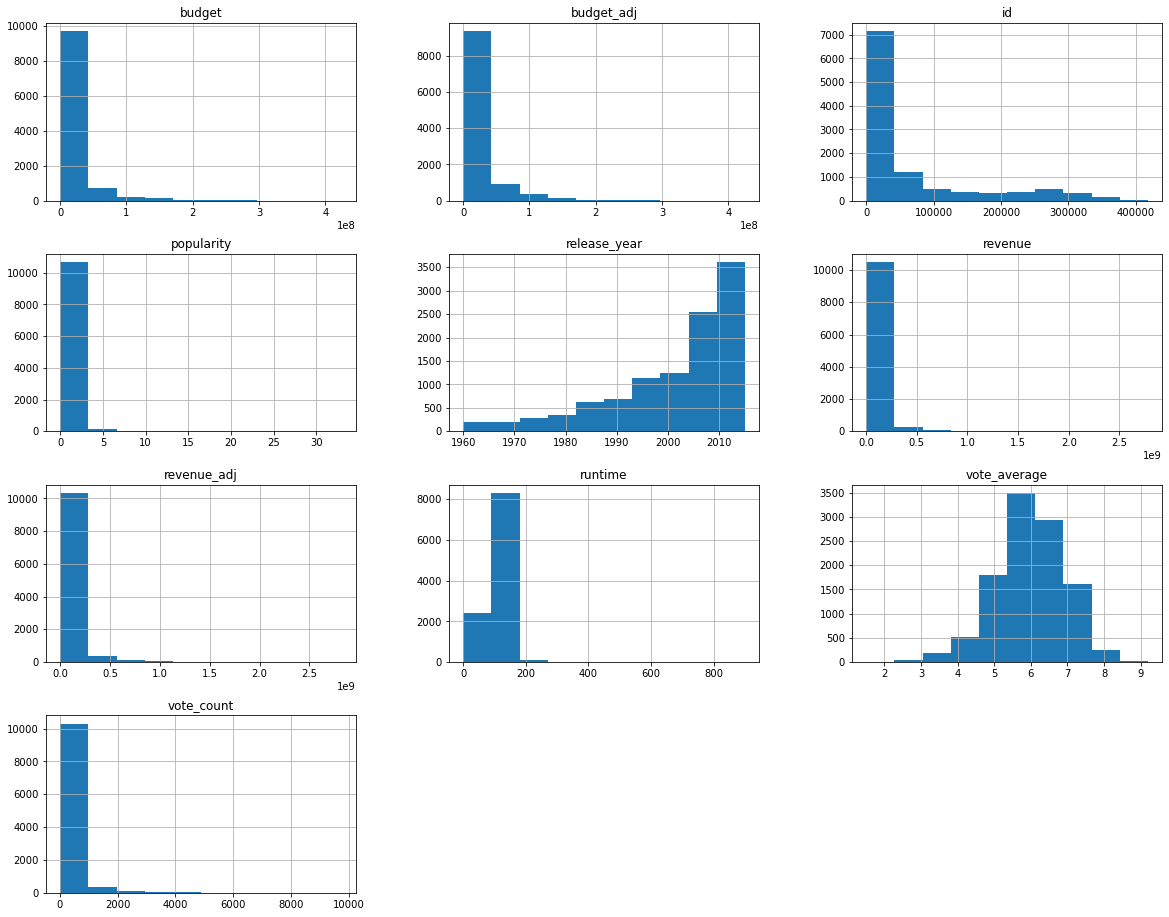

In [56]:
# describe the data visually
df.hist(figsize = (20,16));


From the histograms, it can be noted that revenues and budgets are very skewed to the right with majority of the movies having similar range for revenues and budgets. The popularity is also very right skewed. The majority of the movies have runtime above 100 and below 200 minutes. The vote average is quiet normally distributed with median 6. The vote_count is very right skewed. the release year is left skewed indicating that the majority of movies are released in more recent decades.

In [57]:
# inspect data types and look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The data information reveals that several columns have missing values. Therefore, I will first remove columns that won't be included in the analysis then drop rows with missing values. The data types of the release_year and release_date will be coverted into datetime.

In [58]:
# Dropping columns I will not include in the analysis
df.drop(['id','imdb_id', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace = True)

In [59]:
# Dropping raws with missing values , there are other ways to deal with missing values
df.dropna(inplace = True)

In [60]:
# converting release_date to datetime 

df['release_date'] = pd.to_datetime(df['release_date'])

In [61]:
# checking for the amendments (now we have 10843 observations with no missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10843 non-null  float64       
 1   budget        10843 non-null  int64         
 2   revenue       10843 non-null  int64         
 3   runtime       10843 non-null  int64         
 4   genres        10843 non-null  object        
 5   release_date  10843 non-null  datetime64[ns]
 6   vote_count    10843 non-null  int64         
 7   vote_average  10843 non-null  float64       
 8   release_year  10843 non-null  int64         
 9   budget_adj    10843 non-null  float64       
 10  revenue_adj   10843 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 1016.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis



##  1) Are revenues higher in certain months of the year?

In [64]:
# grouping revenue by month and getting the mean
df.groupby(df['release_date'].dt.strftime('%B'))['revenue'].mean().sort_values(ascending=False)

release_date
June         7.464962e+07
May          6.244414e+07
December     5.933931e+07
July         5.686996e+07
November     5.638361e+07
March        3.819454e+07
April        3.311576e+07
February     2.881191e+07
August       2.781416e+07
October      2.556943e+07
September    1.934698e+07
January      1.415773e+07
Name: revenue, dtype: float64

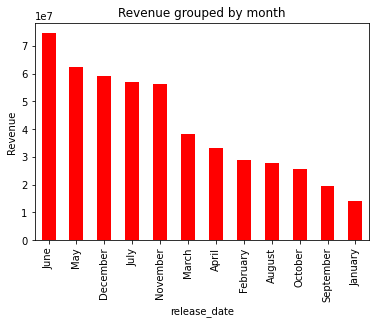

In [83]:
# visualing the result
df.groupby(df['release_date'].dt.strftime('%B'))['revenue'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'red');
plot.title('Revenue grouped by month')
#plot.xlabel('categories')
plot.ylabel('Revenue')
plot.show()


Both the statistics and the visual show that revenues are higher in certain months. Specifically, the highest revenues are attained in the month of june. It can be noted that revenues are higher in summer months (i.e., May, June, July) as well as in November and December as compared to the rest of the year. This could be due to vacations in these months.

## 2) What are the factors associated with higher revenues?

In [66]:
# Querying data for movies with higher revenues and those with lower revenues and comparing the mean of the features
higher_revenue = df.query('revenue > revenue.mean()')
lower_revenue = df.query('revenue < revenue.mean()')
print(lower_revenue.mean())
print(higher_revenue.mean())

popularity      4.030367e-01
budget          5.309402e+06
revenue         3.918041e+06
runtime         9.950484e+01
vote_count      6.850150e+01
vote_average    5.895239e+00
release_year    2.001176e+03
budget_adj      6.978571e+06
revenue_adj     6.325278e+06
dtype: float64
popularity      1.624907e+00
budget          5.203740e+07
revenue         1.838336e+08
runtime         1.126657e+02
vote_count      8.149249e+02
vote_average    6.288843e+00
release_year    2.001875e+03
budget_adj      6.001727e+07
revenue_adj     2.320238e+08
dtype: float64


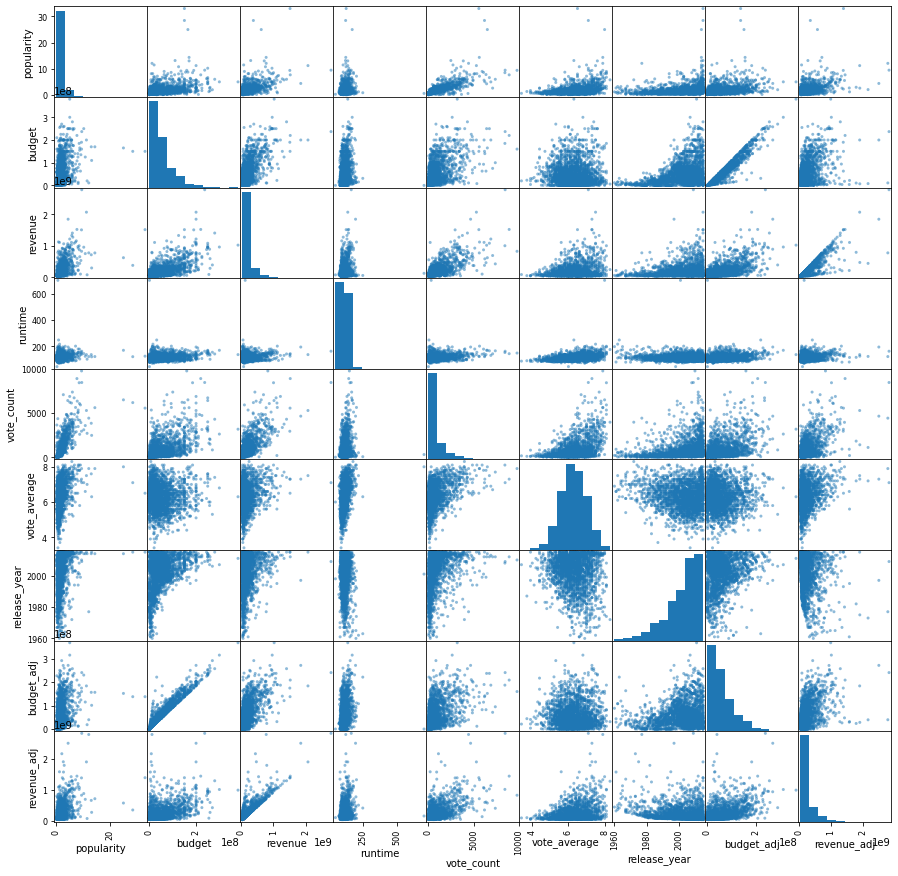

In [67]:
## visulizing the higher_revenue df to look deeper into features correlated with higher revenues;
pd.plotting.scatter_matrix(higher_revenue, figsize = (15,15));


Both the mean comparison and the scatter matrix indicate that higher revenues are positively correlated with popularity, budget, runtime, and vote_count.

## 3) How is the relation between revenue and budget differ across decades?

In [102]:
# grouping data by decade and computing the mean values and renaming columns to reflect the means

subset = df.groupby((df.release_year//10)*10).mean()
subset.rename(columns = lambda x:x[:10]+'_mean', inplace = True)
subset

,popularity_mean,budget_mean,revenue_mean,runtime_mean,vote_count_mean,vote_avera_mean,release_ye_mean,budget_adj_mean,revenue_ad_mean
release_year,,,,,,,,,
1960,0.424244,1.597268e+06,8.331589e+06,111.417127,70.616022,6.246133,1964.660221,1.084316e+07,5.660367e+07
1970,0.485495,2.342330e+06,2.073130e+07,108.075099,109.586957,6.376680,1974.778656,9.315554e+06,8.289734e+07
1980,0.524726,6.205355e+06,2.748578e+07,104.330508,123.110169,6.080132,1985.116761,1.261596e+07,5.602899e+07
1990,0.621460,1.688920e+07,4.487941e+07,106.674986,179.330686,5.998469,1994.989790,2.379675e+07,6.437015e+07
2000,0.632699,1.950502e+07,4.633875e+07,102.123172,219.832115,5.920247,2005.318335,2.187869e+07,5.179584e+07
2010,0.756360,1.431102e+07,4.065700e+07,97.507234,292.741792,5.899638,2012.673066,1.361108e+07,3.854069e+07


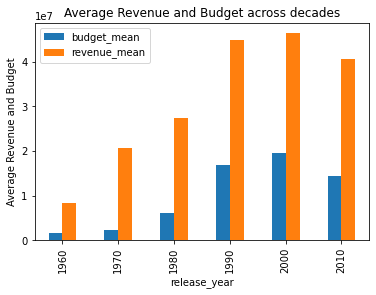

In [103]:
# visulizing the result
subset.loc[:,['budget_mean','revenue_mean']].plot(kind = 'bar');
plot.title('Average Revenue and Budget across decades')

plot.ylabel('Average Revenue and Budget')
plot.show()

Both the statistics and the visual show that the average budget and average revenues have increased over decades except for the last decade. It can be noted that budget and revenue are generally positively correlated, where movies with higher budget tend to attain higher revenue.

## 4) Is popularity associated with the number and average of votes?

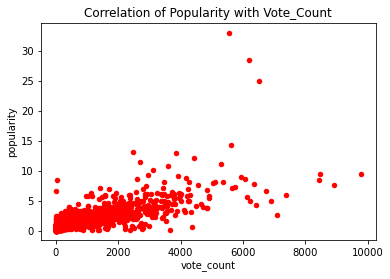

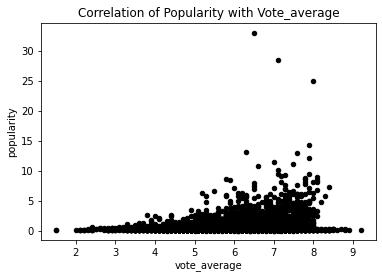

In [89]:
# plotting a scatter plot to see the association between popularity and vote_count and vote_average
df.plot(x='vote_count', y = 'popularity', kind = 'scatter', color = 'red', title ='Correlation of Popularity with Vote_Count')
df.plot(x='vote_average', y = 'popularity', kind = 'scatter', color = 'black', title = 'Correlation of Popularity with Vote_average')
plot.show()

The first figure show a positive correlation between popularity and vote_count indicating that the number of votes can be an indicator for higher movies' popularity. However, the second figure does not show similar association with vote_average indicating that vote_count can be considered a better indicator for popularity. 

## 5) How is popularity, number of votes, average votes changed across decades?

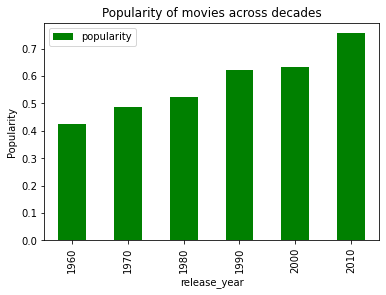

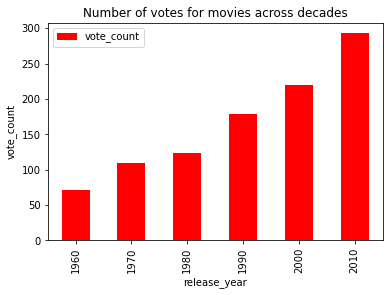

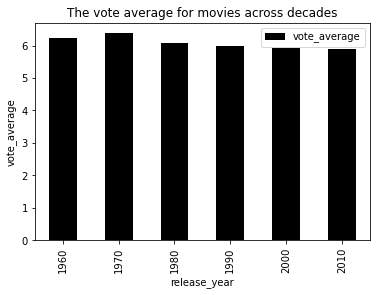

In [97]:
# visualizing the trends in popularity, vote_count, vote_average
subset.loc[:,['popularity']].plot(kind = 'bar', color = 'green');
plot.title('Popularity of movies across decades')
plot.ylabel('Popularity')
subset.loc[:,['vote_count']].plot(kind = 'bar', color = 'red');
plot.title('Number of votes for movies across decades')
plot.ylabel('vote_count')
subset.loc[:,['vote_average']].plot(kind = 'bar', color = 'black');
plot.title('The vote average for movies across decades')
plot.ylabel('vote_average')
plot.show()

The first figure shows an increasing trend for popularity across decades. The second figure shows a similar increaing trend for the number of votes. This confirms the positive association between popularity and vote_count. Finally, the last figure show no significant change in vote_average across decades which confirms that the popularity is not generally associated with vote_average.

<a id='conclusions'></a>
## Conclusions

> The current project aims at analyzing the TMDb movies dataset. This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including movies popularity and revenue. The project included summary statistics as well as visuals describing the features. The majority of the features have different mean and median indicating the existence of outliers. Thus, this analysis is limited to not dealing with outliers. Histograms show that the majority of the features have skewed distribution. The data information showed that several features have missing values. After excluding columns not considered in the analysis, observations with missing values were dropped. This is another limitation for the analysis as there are better ways to deal with missing values like filling them with mean/median. 
> The exploratory data analysis reveals the following:
1)  Movies revenues are higher in certain months of the year especially June and May.
2)  Higher revenues are positively correlated with some factors (e.g. popularity, budget, runtime, and vote_count)
3)  Digging deeper into the relation between revenues and budget, the analysis reveal an increasing trend of revenue and budget across decades.
4) Movies' popularity seem to be more positively correlated with the number of votes rather than vote-average.
5) The movies in the dataset tend to receive higher number of votes and more popularity overtime, while the vote_average of the movies tends to be constant overtime.